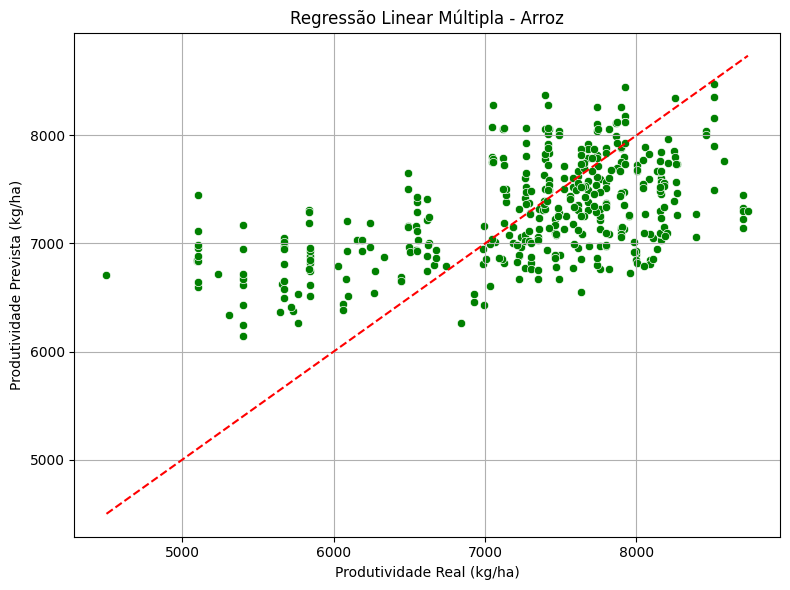

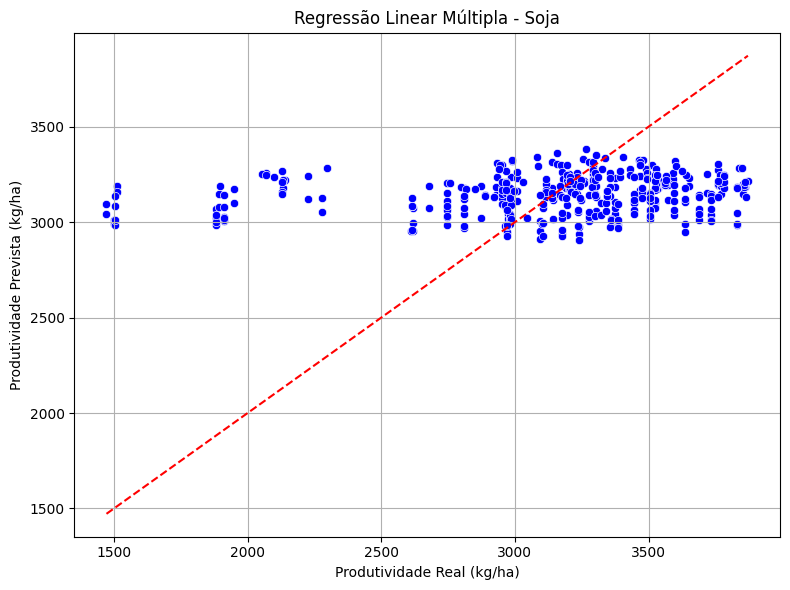

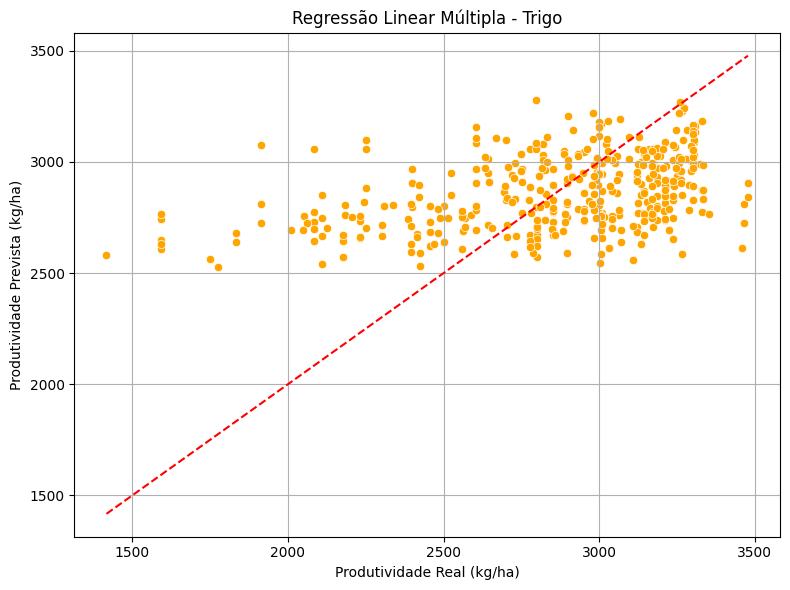

  Cultura     R²     MAE    RMSE
0   Arroz  0.293  568.94  716.82
1    Soja  0.036  377.98  516.16
2   Trigo  0.172  284.23  358.86


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar os dados
df = pd.read_csv("/content/Dados_Completos.csv")

# Filtrar dados para cada cultura
df_arroz = df[df['Produto'] == '1.4 Arroz']
df_soja = df[df['Produto'] == '1.15 Soja']
df_trigo = df[df['Produto'] == '1.17 Trigo']

# Paleta de cores para facilitar a visualização
cores = {
    'Arroz': 'green',
    'Soja': 'blue',
    'Trigo': 'orange'
}

# Função para treinar e plotar regressão linear múltipla
def regressao_e_plot(df, nome_cultura):
    X = df[[
        'Temperatura Media',
        'Precipitacao Total',
        'Pressao Atmosferica Media',
        'Vento Velocidade Media'
    ]]
    y = df['Rendimento Médio (kg/ha)']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Métricas
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y, y=y_pred, color=cores[nome_cultura])
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Produtividade Real (kg/ha)')
    plt.ylabel('Produtividade Prevista (kg/ha)')
    plt.title(f'Regressão Linear Múltipla - {nome_cultura}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        'Cultura': nome_cultura,
        'R²': round(r2, 3),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2)
    }

# Aplicar a função para cada cultura
result_arroz = regressao_e_plot(df_arroz, 'Arroz')
result_soja = regressao_e_plot(df_soja, 'Soja')
result_trigo = regressao_e_plot(df_trigo, 'Trigo')

# Mostrar as métricas
df_resultados = pd.DataFrame([result_arroz, result_soja, result_trigo])
print(df_resultados)


['1.4 Arroz' '1.8 Feijao (1 Safra)' '1.9 Feijao (2 Safra)'
 '1.10 Feijao (3 Safra)' '1.13 Milho (1 Safra)' '1.14 Milho (2 Safra)'
 '1.15 Soja' '1.17 Trigo' '15 Fumo']


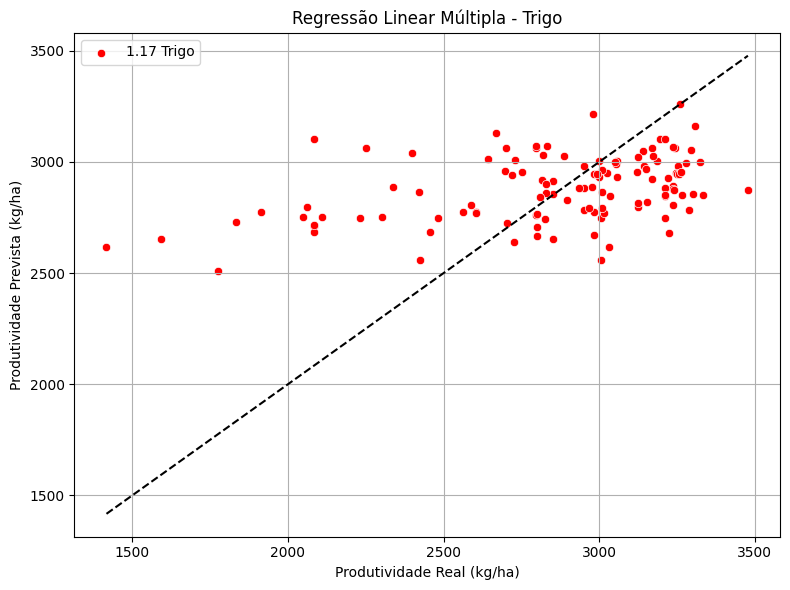

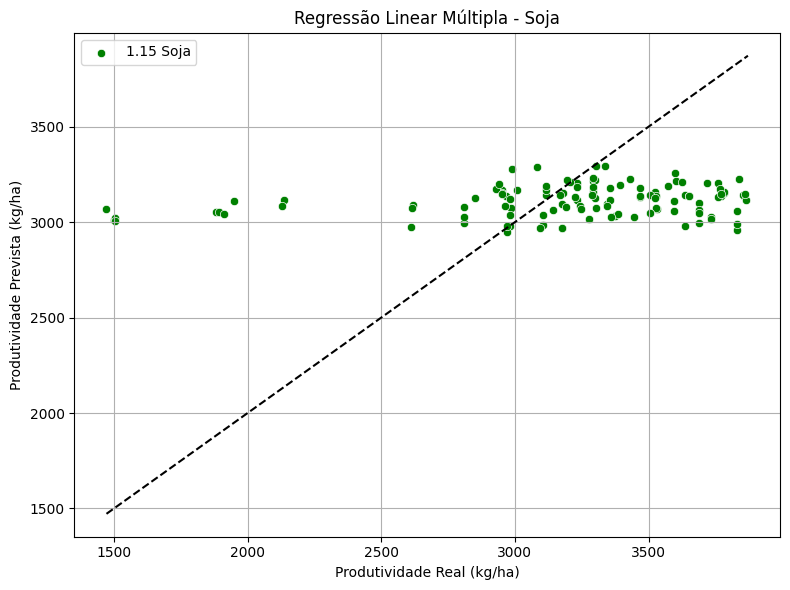

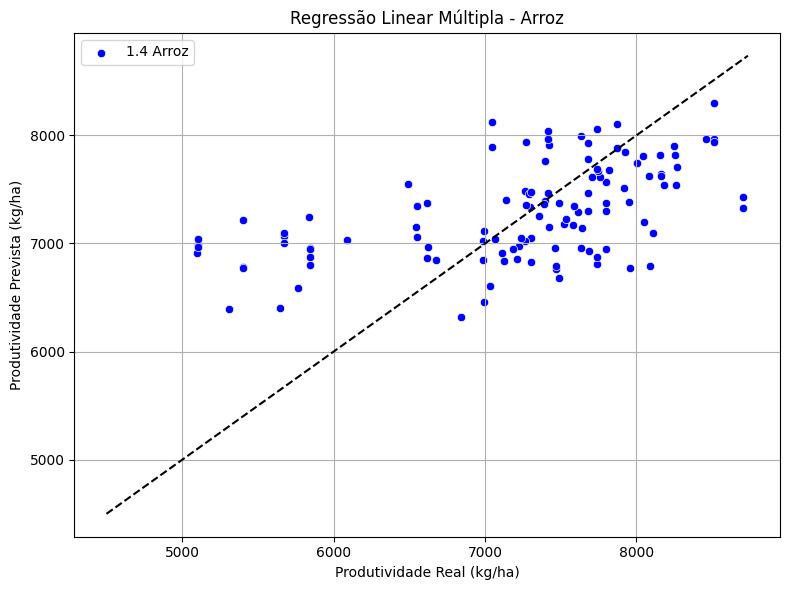

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("/content/Dados_Completos.csv")

# Remover espaços das colunas
df.columns = [col.strip() for col in df.columns]

# Verificar nomes exatos das culturas
print(df['Produto'].unique())

# Selecionar as variáveis climáticas
climate_vars = ['Temperatura Media', 'Precipitacao Total', 'Pressao Atmosferica Media', 'Vento Velocidade Media']

# Dicionário de cores por cultura
colors = {
    '1.17 Trigo': 'red',
    '1.15 Soja': 'green',
    '1.4 Arroz': 'blue'
}

# Função para rodar regressão linear para um produto específico e plotar
def run_regression(crop_name):
    crop_df = df[df['Produto'] == crop_name].dropna(subset=climate_vars + ['Rendimento Médio (kg/ha)'])

    if crop_df.empty:
        print(f"Sem dados suficientes para: {crop_name}")
        return None

    X = crop_df[climate_vars]
    y = crop_df['Rendimento Médio (kg/ha)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Plot de dispersão com cor específica
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color=colors[crop_name], label=crop_name)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Produtividade Real (kg/ha)')
    plt.ylabel('Produtividade Prevista (kg/ha)')
    plt.title(f'Regressão Linear Múltipla - {crop_name.split()[-1]}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        'Cultura': crop_name,
        'R²': round(r2, 3),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'Coeficientes': dict(zip(climate_vars, model.coef_)),
        'Intercepto': round(model.intercept_, 2)
    }

# Aplicar para Trigo, Soja e Arroz
results = []
for crop in ['1.17 Trigo', '1.15 Soja', '1.4 Arroz']:
    result = run_regression(crop)
    if result:
        results.append(result)

In [ ]:
# Mostrar os resultados no terminal
print("\nResumo das Regressões Lineares por Cultura:\n")
for res in results:
    print(f"Cultura: {res['Cultura']}")
    print(f"  R²: {res['R²']}")
    print(f"  MAE: {res['MAE']}")
    print(f"  RMSE: {res['RMSE']}")
    print(f"  Intercepto: {res['Intercepto']}")
    print("  Coeficientes:")
    for var, coef in res['Coeficientes'].items():
        print(f"    {var}: {round(coef, 2)}")
    print("-" * 40)


Resumo das Regressões Lineares por Cultura:

Cultura: 1.17 Trigo
  R²: 0.171
  MAE: 288.75
  RMSE: 374.73
  Intercepto: 3353.4
  Coeficientes:
    Temperatura Media: -41.16
    Precipitacao Total: 0.4
    Pressao Atmosferica Media: 0.53
    Vento Velocidade Media: -151.71
----------------------------------------
Cultura: 1.15 Soja
  R²: 0.013
  MAE: 397.87
  RMSE: 530.27
  Intercepto: 3072.96
  Coeficientes:
    Temperatura Media: 16.26
    Precipitacao Total: 0.06
    Pressao Atmosferica Media: 0.1
    Vento Velocidade Media: -173.19
----------------------------------------
Cultura: 1.4 Arroz
  R²: 0.288
  MAE: 575.34
  RMSE: 737.36
  Intercepto: 7228.06
  Coeficientes:
    Temperatura Media: -68.6
    Precipitacao Total: 1.0
    Pressao Atmosferica Media: -1.01
    Vento Velocidade Media: 1045.99
----------------------------------------
